In [2]:
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/var/folders/rd/5zstcb7s5693ycn6jp0glgjw0000gn/T/ipykernel_4695/228374613.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'], kde = False, bins=40)


<Axes: xlabel='total_bill'>

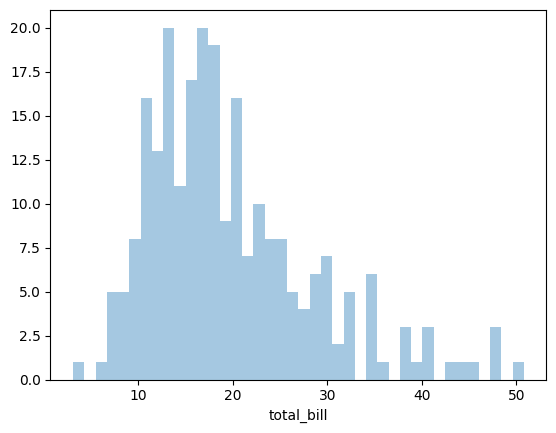

In [5]:
#DIST Plot
sns.distplot(tips['total_bill'], kde = False, bins=40)

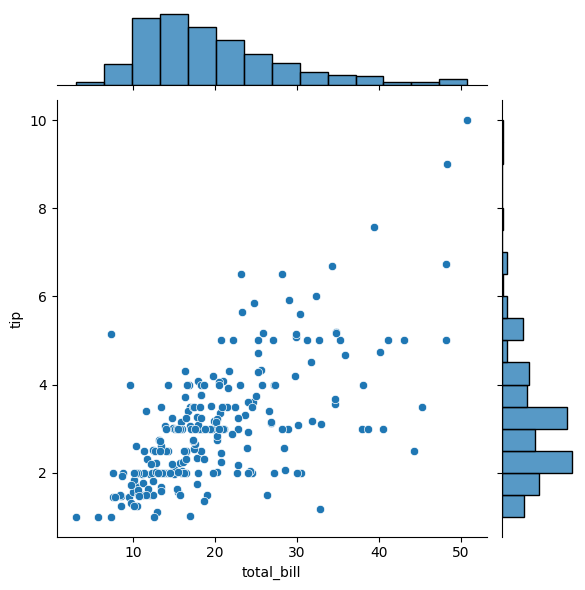

In [6]:
#JointPlot
#kind allows you to control how you want to show the plot
sns.jointplot(x='total_bill',y='tip', data=tips)
# sns.jointplot(x='total_bill',y='tip', data=tips, kind='hex')
# sns.jointplot(x='total_bill',y='tip', data=tips, kind='kde')
# sns.jointplot(x='total_bill',y='tip', data=tips, kind='reg')

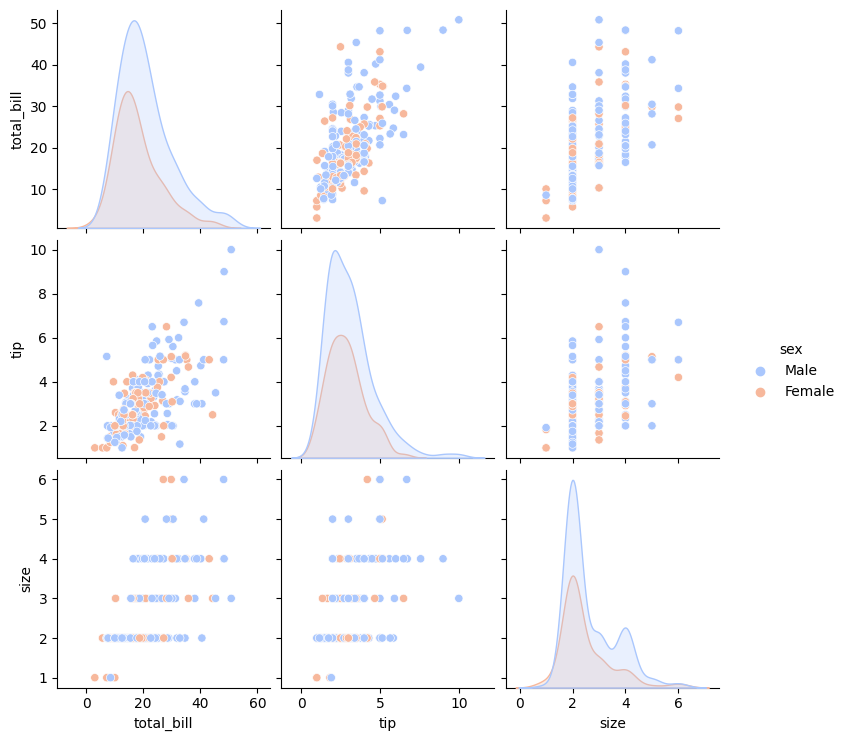

In [7]:
#PairPlot

#pair plot to see all pair plots possible
# sns.pairplot(tips)

#hue for categorizing
sns.pairplot(tips, hue='sex', palette='coolwarm')

<Axes: xlabel='total_bill'>

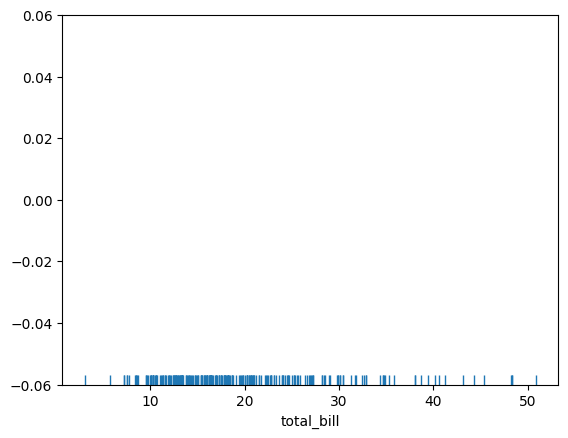

In [8]:
#RUG Plot
sns.rugplot(tips['total_bill'])

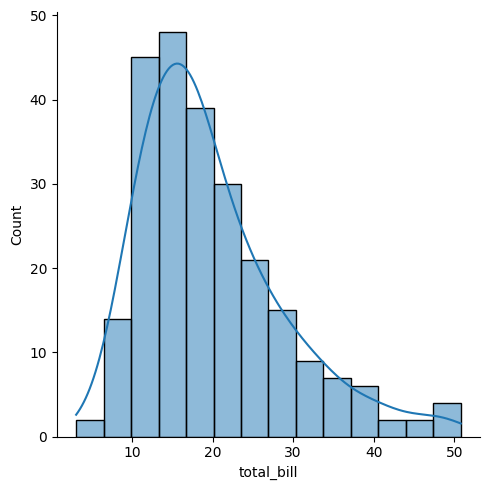

In [9]:
sns.displot(tips['total_bill'], kde=True)
#kde=False

KDE = Kernel density estimation
kde is just the sum of all normal distribution in a rug plot
The following graph shows a random dataset, grey lines represent normal distribution under blue rug plot lines
rug plot basically the number of bins from a single x axis histogram bin.

(0.0, 1.0)

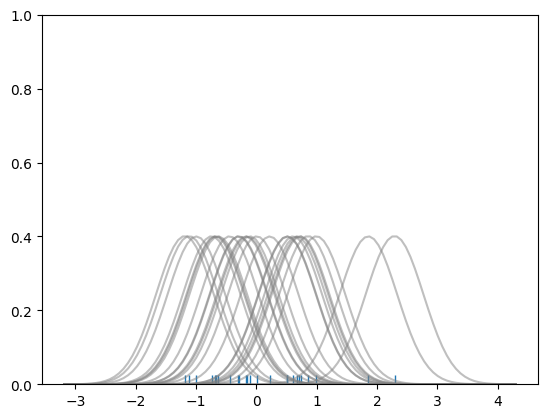

In [10]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

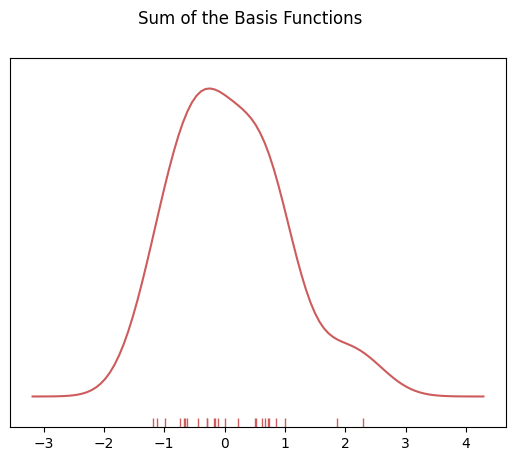

In [11]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<Axes: xlabel='total_bill', ylabel='Density'>

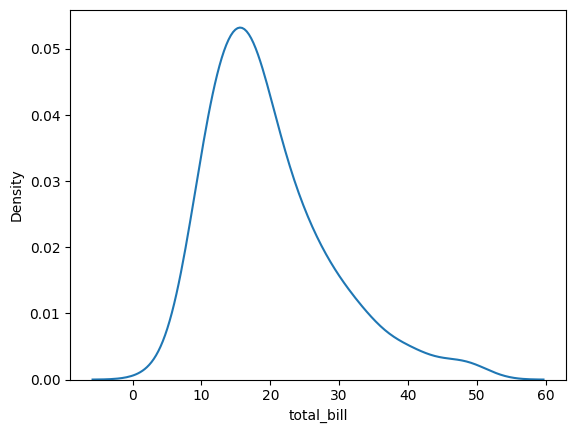

In [12]:
#to not have histogram bins and just the kde distribution
sns.kdeplot(tips['total_bill'])

Categorical Plot: For tips data set sex, smoker, day, type are categories

<Axes: xlabel='sex', ylabel='total_bill'>

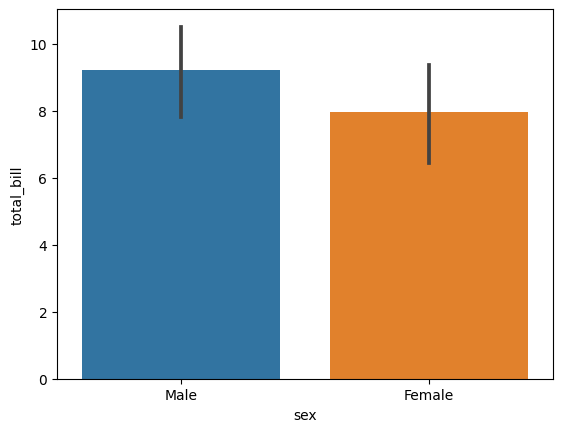

In [13]:
#Bar Plot
import numpy as np

#shows average total bil of male and female
#sns.barplot(x='sex',y='total_bill',data=tips)

#using numpy standard deviation
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std)

<Axes: xlabel='sex', ylabel='count'>

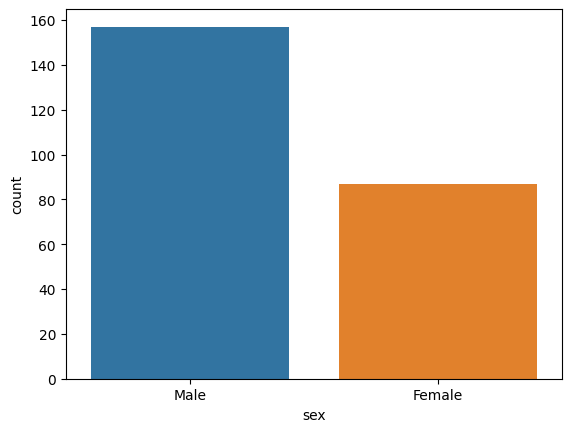

In [14]:
#Count Plot
sns.countplot(x='sex', data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

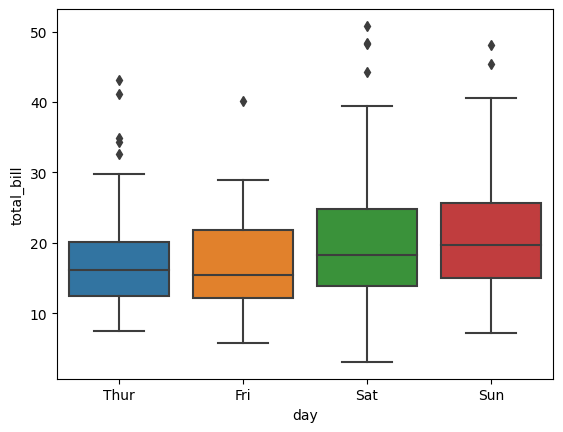

In [15]:
#box plot

#can add another category as parameter with hue
sns.boxplot(x='day', y ='total_bill', data=tips)


<Axes: xlabel='day', ylabel='total_bill'>

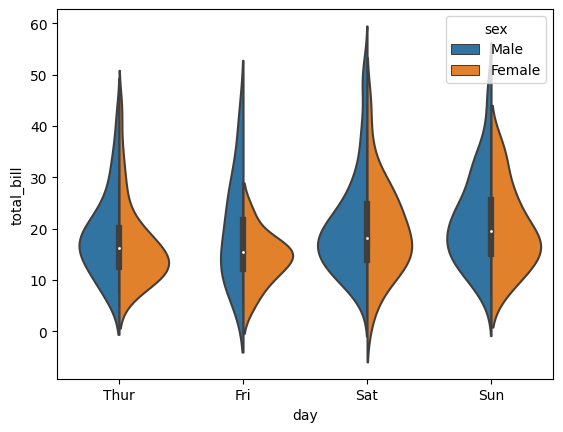

In [16]:
#Violin Plot : shows more info than box plots
sns.violinplot(x='day',y='total_bill',data=tips, hue='sex', split=True)

<Axes: xlabel='day', ylabel='total_bill'>

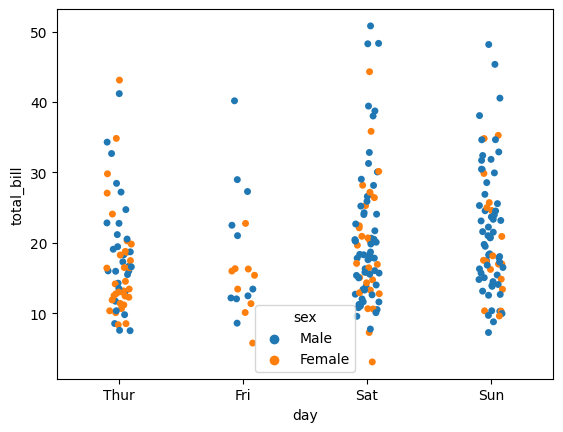

In [17]:
#Strip Plot
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex')

<Axes: xlabel='day', ylabel='total_bill'>

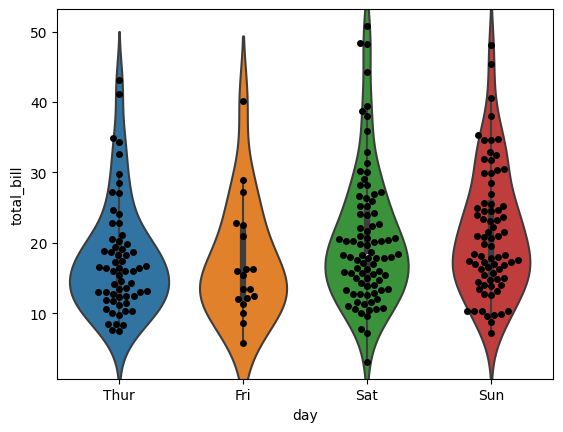

In [18]:
#Swarn plot = combination of scatter/violin with stip plot: not for large datasets

sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='black')

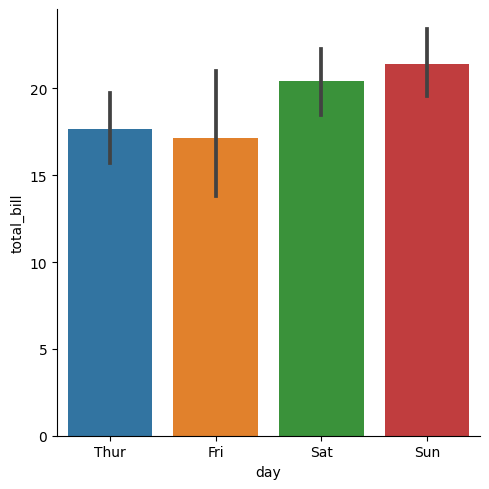

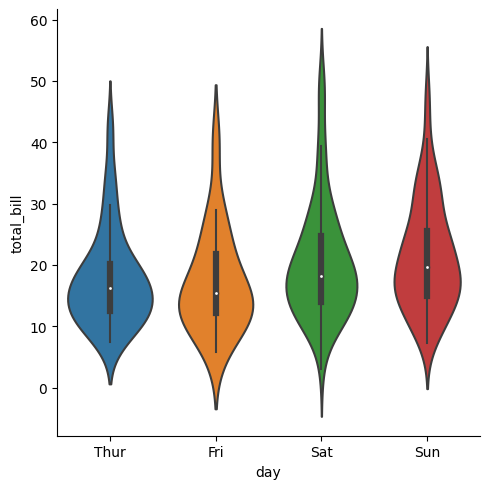

In [19]:
#Cat Plot: it is a general plot method to call other types of plots
sns.catplot(x='day', y='total_bill', data=tips, kind='bar')
sns.catplot(x='day', y='total_bill', data=tips, kind='violin')

In [22]:
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Heatmap or matrix plot helps in visualizing correlation of various datas. It is helpful for correlating data for very large datasets.

In [28]:
tc = tips[['total_bill', 'tip', 'size']].corr()
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

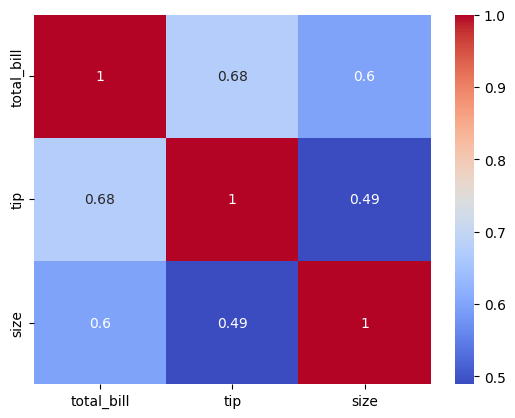

In [31]:
sns.heatmap(tc, annot=True, cmap='coolwarm')

In [34]:
#restructuring the dataframe
flights.pivot_table(index='month', columns='year', values='passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Axes: xlabel='year', ylabel='month'>

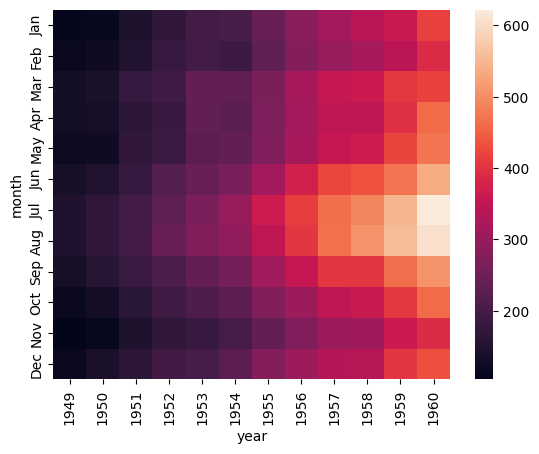

In [39]:
#use heatmap to visulaze the data
#we see as years go by number of passengers increase and most popular months
#are the summer ones
fp = flights.pivot_table(index='month', columns='year', values='passengers')
sns.heatmap(fp)

# other arguments cmap='magma', linecolor = 'black', linewidths=1 (makes
# boxes distinguished)

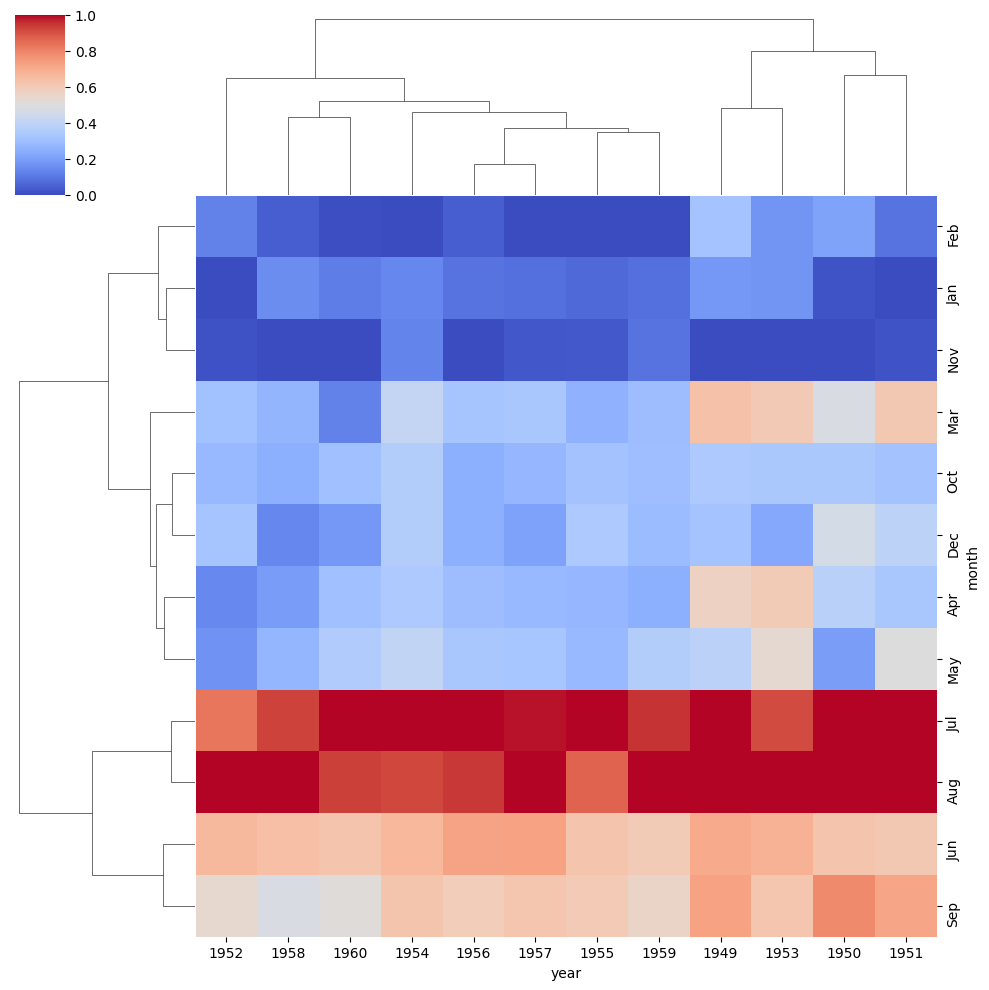

In [41]:
sns.clustermap(fp,cmap='coolwarm', standard_scale=1)

Heatmap vs Clustermap

A heatmap will put things in the order of the dataframe whereas a clustermap will cluster things such that similar things are closer to each other

GRIDS

In [43]:
#dataset for some flowers
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

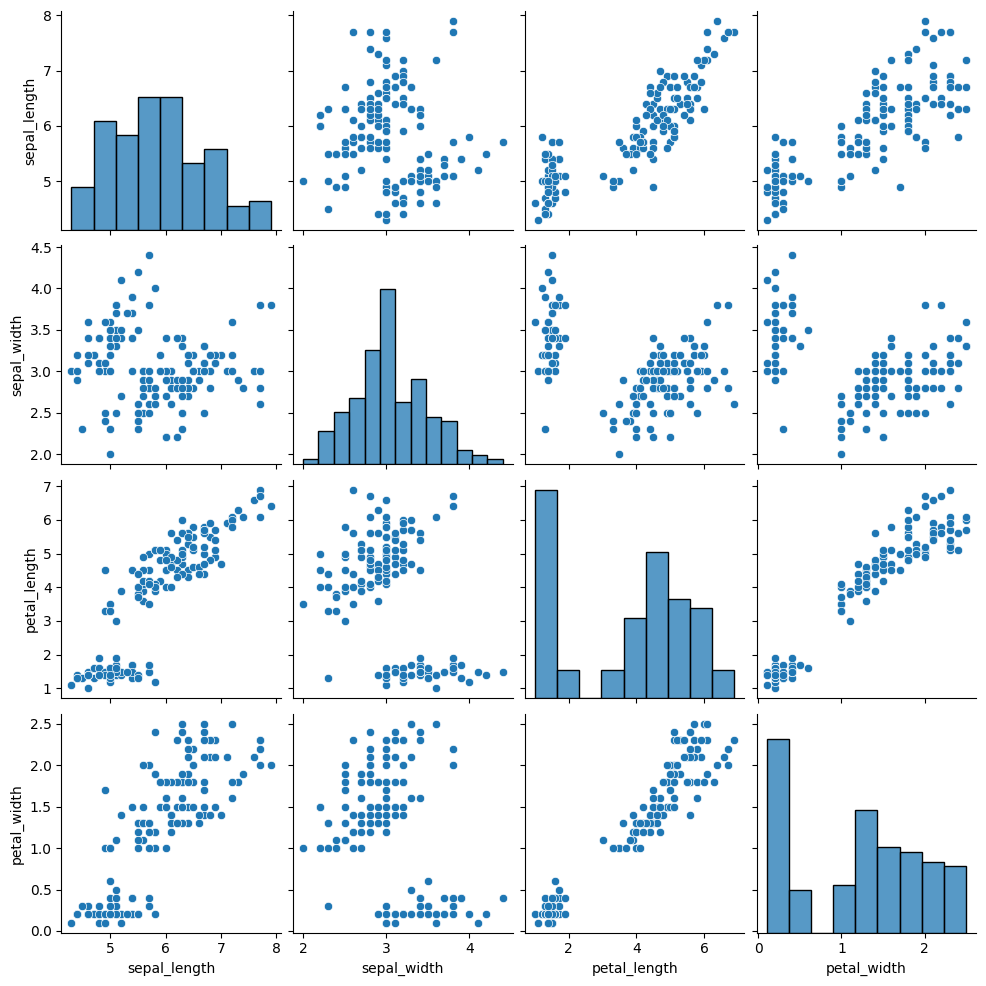

In [45]:
sns.pairplot(iris)

PairGrid will take all the numerical columns and makes subplots. Pairplot is a simplified version of PairGrid which does all the plots automatically whereas with PairGrid we have more control over the plots.

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=colo

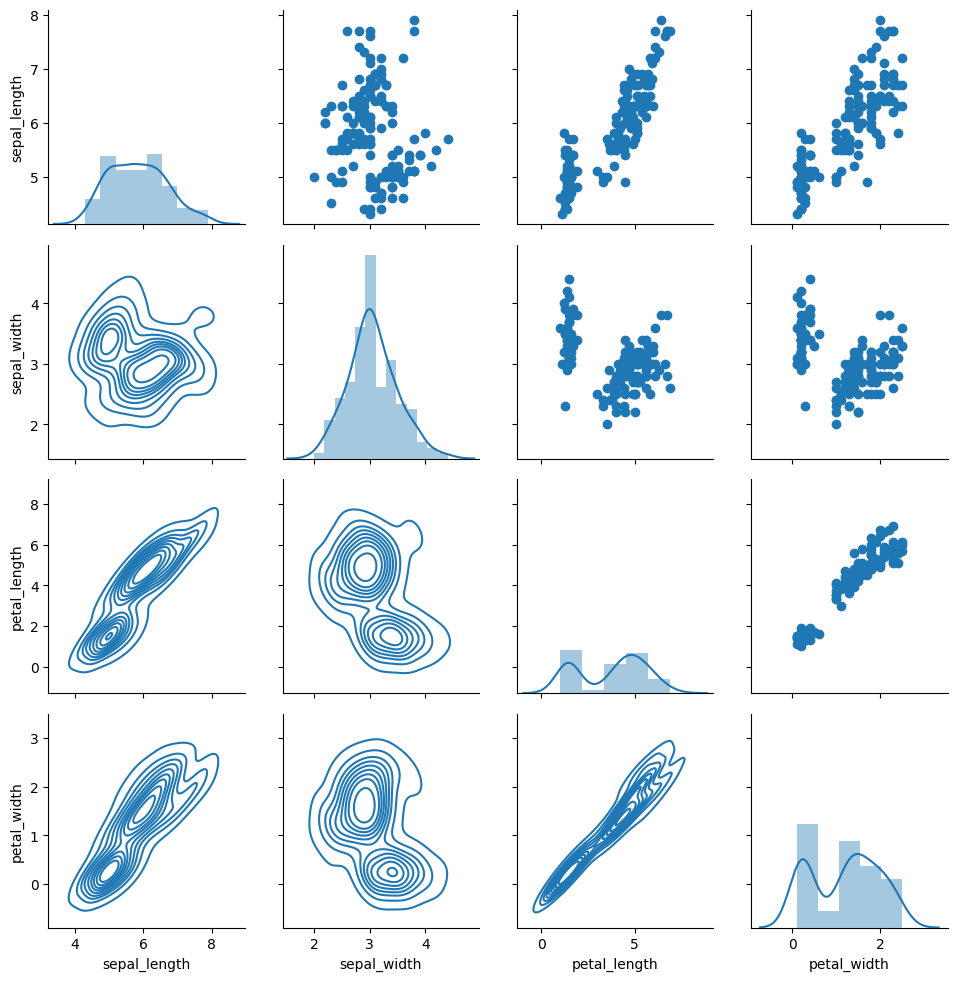

In [49]:
g = sns.PairGrid(iris)
# g.map(plt.scatter)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)


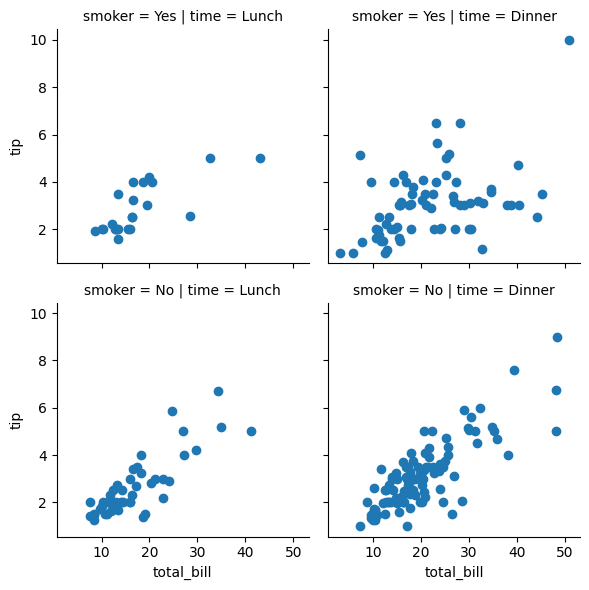

In [58]:
#FacetGrid

g = sns.FacetGrid(data=tips, col='time', row='smoker')
# g.map(sns.distplot, 'total_bill')

#If you want to use a scatter plot for a FacetGrid, you need both x and
#y axis labelled
g.map(plt.scatter, 'total_bill', 'tip')

Regression Plots

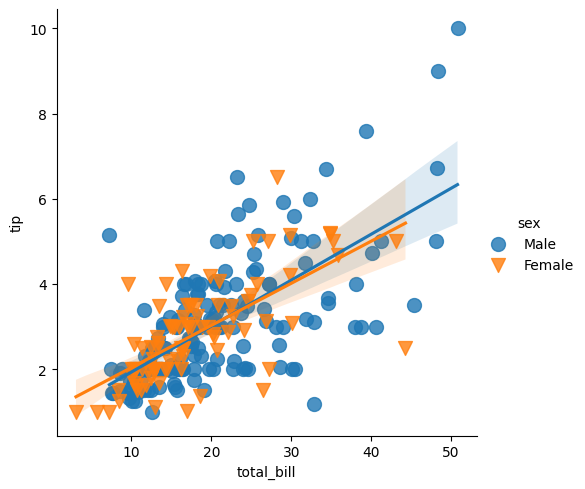

In [64]:
#It also calls matplotlib under the hood, so you can use plt arguments to
#design such as customize markers and increase size to 100
#see docss
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o', 'v'],
           scatter_kws={'s': 100})

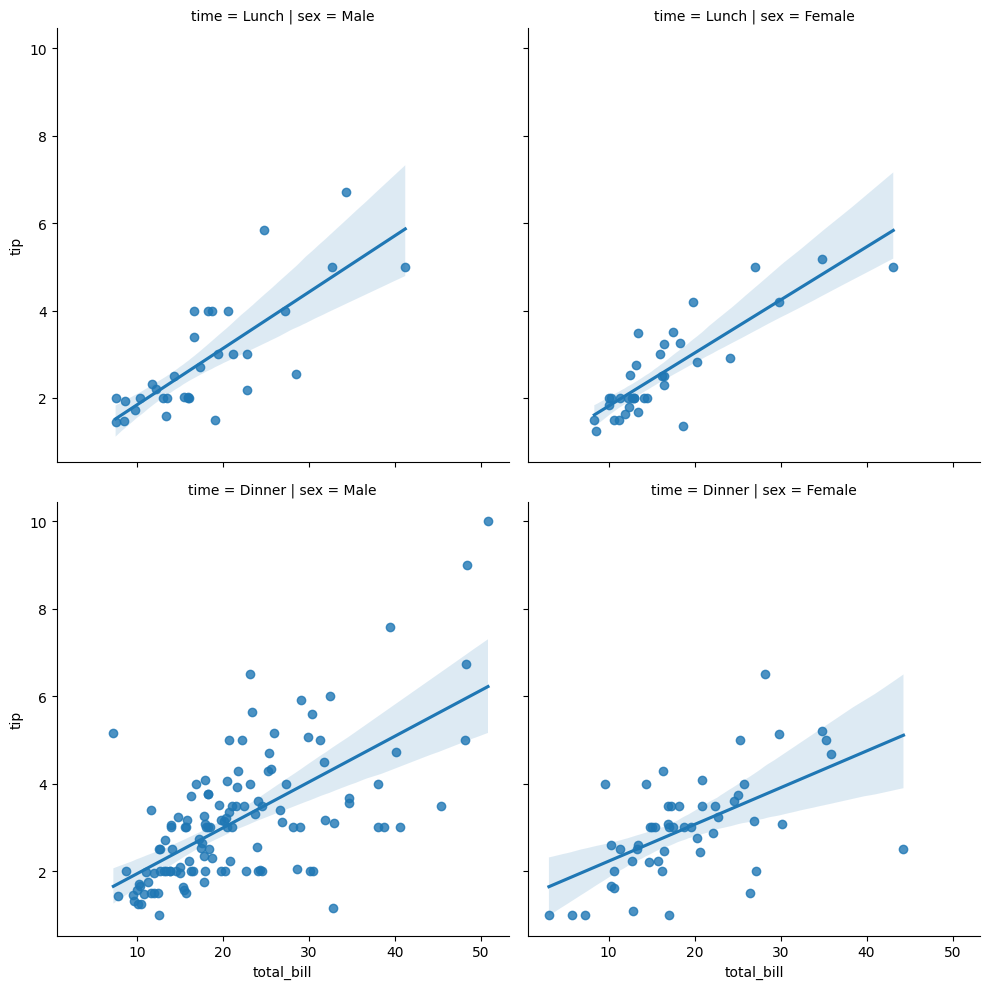

In [66]:
#instead of seperating by hue color we can seperate on categories based
#on rows and columns
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex', row='time')

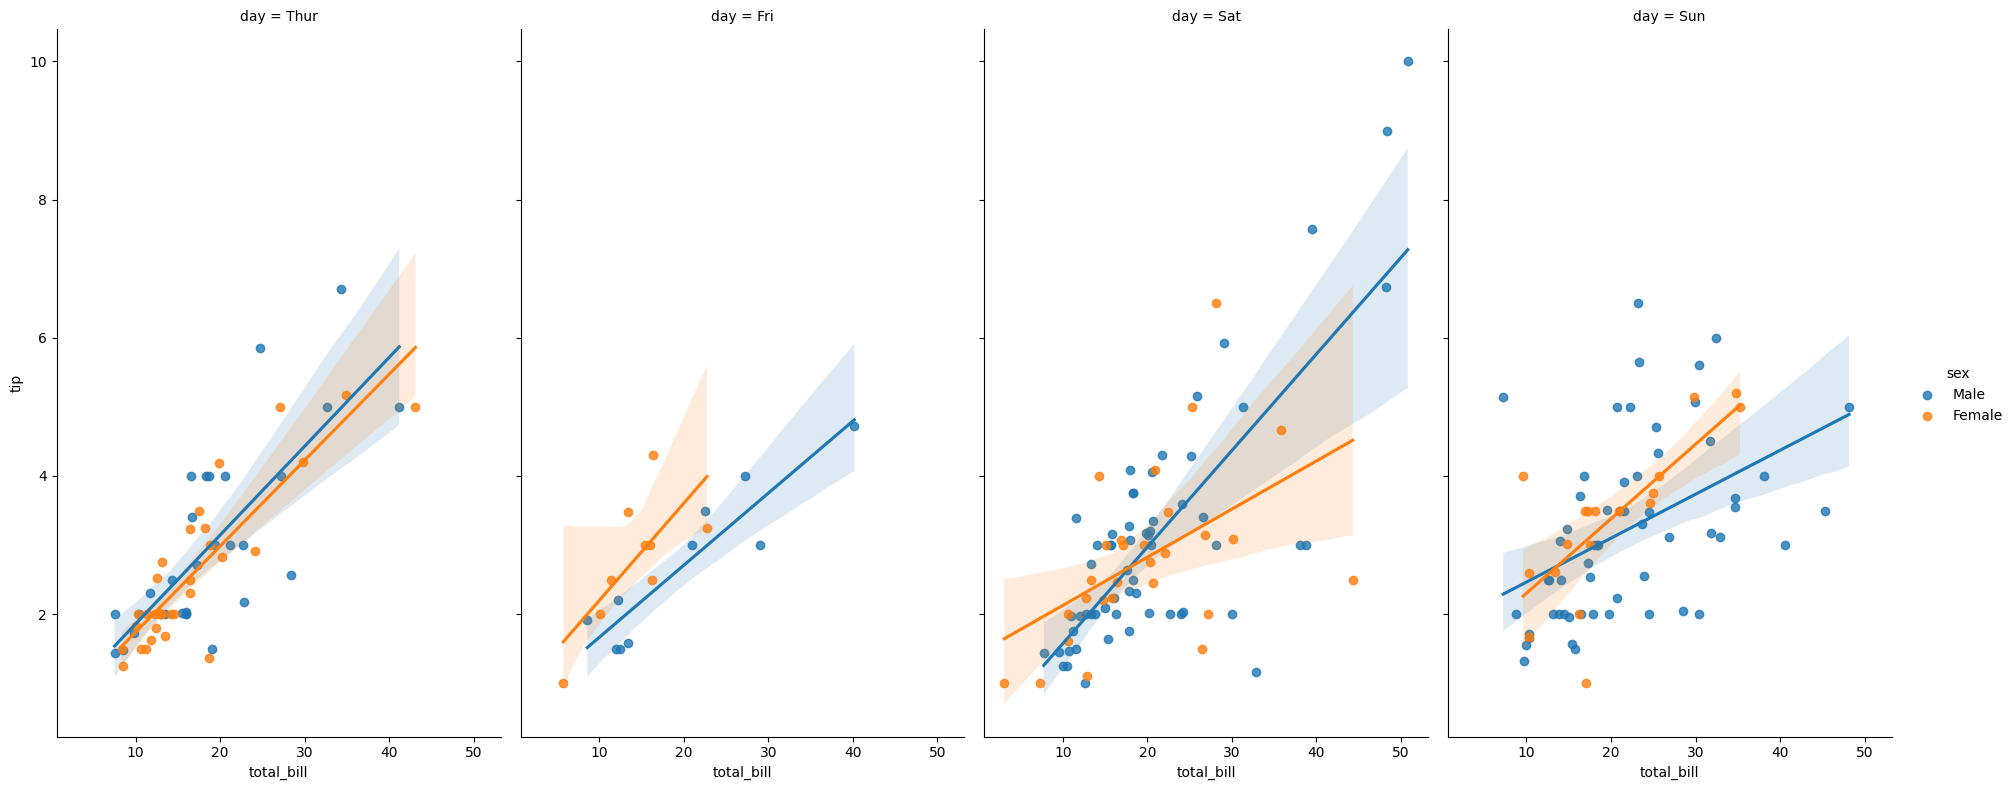

In [71]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='day', hue='sex',
           aspect=0.6, height=8)

Style and Color

<Axes: xlabel='sex', ylabel='count'>

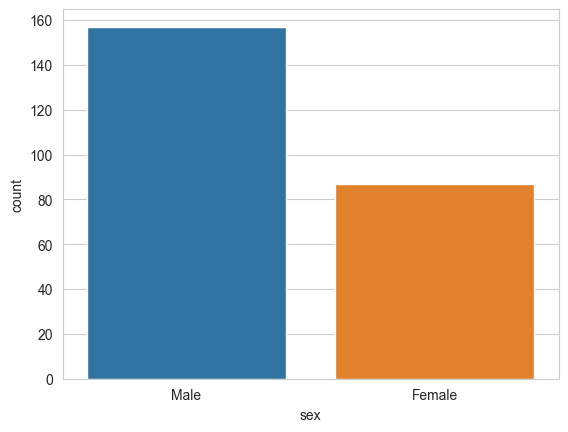

In [76]:
sns.set_style('whitegrid')
sns.countplot(x='sex', data=tips)
# sns.despine(left=True, bottom=True)

<Axes: xlabel='sex', ylabel='count'>

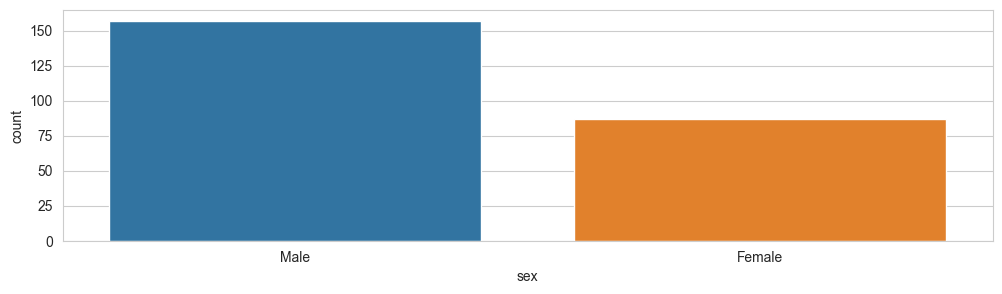

In [77]:
#Matplot lib figsize to change size and width

plt.figure(figsize=(12,3))
sns.countplot(x='sex', data=tips)

<Axes: xlabel='sex', ylabel='count'>

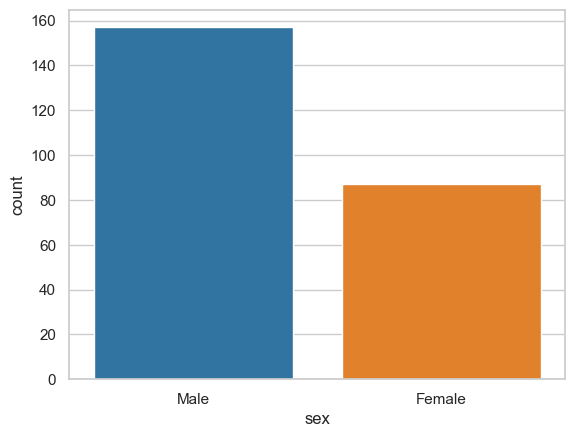

In [82]:
# sns.set_context('poster')
sns.set_context('notebook')
sns.countplot(x='sex', data=tips)

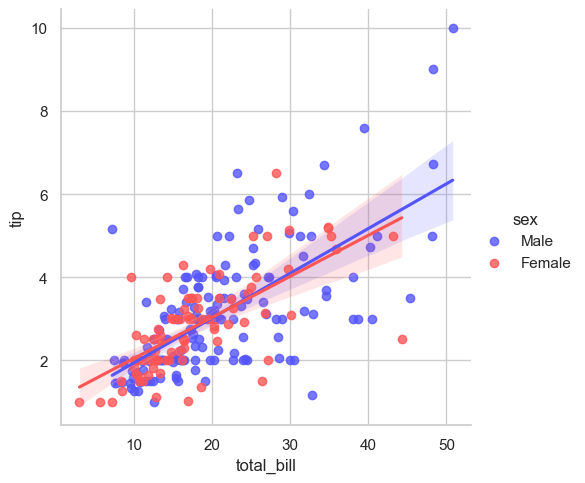

In [85]:
#look at matplotlib colormap docs for pallete
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', palette='seismic')